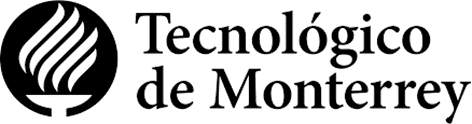 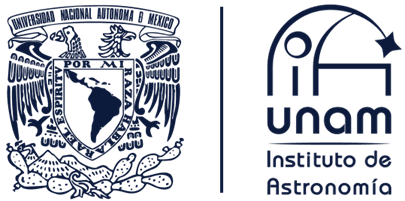


# **Proyecto Integrador**  
## Detección de Galaxias Enanas con métodos de ML  

---

### **Profesores Titulares**  
- Dra. Grettel Barceló Alonso  
- Dr. Luis Eduardo Falcón Morales  

### **Profesor Tutor**  
- Dra. Ludivina Facundo  

### **Patrocinador**  
- Dr. Octavio Valenzuela Tijerino  
  Investigador titular del IA-UNAM  

---

### **Integrantes Equipo 21**  
- Eduardo Rodríguez Ramírez  
  - A01794892@tec.mx  
- Víctor Hugo Avila Felipe  
  - A01794425@tec.mx  

---



# Reporte de Análisis Exploratorio de Datos (EDA)
El presente documento describe el análisis exploratorio realizado sobre un conjunto de datos relacionado con galaxias y objetos celestes. El objetivo principal es responder a preguntas clave sobre la calidad y distribución de los datos, así como identificar patrones relevantes para futuras etapas de modelado. Este análisis está enfocado en preparar el dataset para la implementación de un modelo de clasificación binaria que prediga si un objeto es una galaxia o no.

## Descripción General del Dataset
A continuación, se describen las columnas principales del dataset y su significado dentro del contexto astronómico:

- **ID**: Identificador único de cada objeto.
- **Conf**: Nivel de confianza asociado al objeto (escala discreta de 0 a 4).
- **RAdeg**: Ascensión recta del objeto en grados (posición en el cielo).
- **DEdeg**: Declinación del objeto en grados (posición en el cielo).
- **zphot**: Redshift fotométrico, que indica la distancia al objeto (valores mayores implican mayor distancia).
- **r'mag**: Magnitud aparente en la banda r', una medida del brillo del objeto.
- **Mstar**: Masa estelar estimada del objeto (en unidades solares).
- **g'-r'**: Índice de color, calculado como la diferencia de magnitudes entre las bandas g' y r'.
- **R/B**: Clasificación inicial basada en el color del objeto: rojo (`R`) o azul (`B`).
- **img_name**: Nombre del archivo de imagen asociado al objeto.
- **class**: Variable objetivo binaria que indica si el objeto es una galaxia (`1`) o no (`0`).
- **A, F, H, L, M, S**: Indicadores binarios que representan características específicas observadas en los objetos.

In [33]:
import pandas as pd

# Cargar dataset
# Configuración de rutas
IMAGE_DIR = "..\lsb_data\imagenes"  # Carpeta con las imágenes
IMAGE_OUT_DIR = "..\lsb_data\imagenes_proc"
CSV_PATH = "..\lsb_data\metadata\Atkinson_Walmsley_class.csv"  # Ruta al archivo CSV

data = pd.read_csv(CSV_PATH)

data.drop(columns='Unnamed: 0', inplace=True)

#Separando la columna Feat en columas bianrias individuales para cada atributo.
unique_feats = set(";".join(data['Feat']).split(";")) - {"-"}
for feat in unique_feats:
    data[feat] = data['Feat'].apply(lambda x: 1 if feat in x else 0)

# Drop the original 'Feat' column
data = data.drop(columns=['Feat'])

data.head()

,ID,Conf,RAdeg,DEdeg,zphot,r'mag,Mstar,g'-r',R/B,img_name,class,A,L,S,H,M,F
0,W1-2,4,30.690147,-11.165118,0.147,-22.38,11.06,0.623,R,W1-2_color.jpg,1.0,1,1,0,0,0,1
1,W1-3,1,30.201271,-11.144945,0.178,-23.43,11.24,0.413,B,W1-3_color.jpg,0.0,0,0,0,0,0,0
2,W1-4,0,30.391056,-11.107487,0.182,-23.71,11.36,0.414,B,W1-4_color.jpg,0.0,0,0,0,0,0,0
3,W1-7,4,30.196264,-11.033447,0.120,-22.10,10.95,0.623,R,W1-7_color.jpg,1.0,1,1,1,0,0,0
4,W1-8,0,30.493235,-11.019429,0.113,-21.76,10.80,0.616,R,W1-8_color.jpg,0.0,0,0,0,0,0,0


## Estadísticas Generales del Dataset
El dataset contiene 1760 registros y 12 columnas que describen diferentes atributos de los objetos celestes. A continuación, se presentan las estadísticas generales del dataset:

- **Número de registros:** 1760
- **Número de columnas:** 12
- **Columnas con datos numéricos:** 8
- **Columnas categóricas:** 3 (R/B, img_name, ID)
- **Indicadores binarios:** 6 (A, F, H, L, M, S)
- **Variable objetivo:** class (binaria, 1: galaxia, 0: no galaxia)

In [34]:
# Resumen estadístico del dataset
summary_statistics = data.describe().transpose()
summary_statistics

,count,mean,std,min,25%,50%,75%,max
Conf,1760.0,0.905682,1.407028,0.000000,0.000000,0.000000,2.000000,4.000000
RAdeg,1760.0,166.329099,105.741734,30.196264,36.402993,210.773483,217.796947,335.701508
DEdeg,1760.0,19.368272,29.656129,-11.228167,-6.879644,1.025838,54.408779,57.796677
zphot,1760.0,0.125057,0.036403,0.041000,0.093000,0.123000,0.151000,0.198000
r'mag,1760.0,-22.152852,0.815681,-24.060000,-22.790000,-22.220000,-21.547500,-19.300000
Mstar,1760.0,10.836756,0.387129,9.400000,10.550000,10.880000,11.140000,11.640000
g'-r',1760.0,0.504537,0.128446,0.053000,0.407750,0.552500,0.610000,0.708000
class,1624.0,0.189039,0.391661,0.000000,0.000000,0.000000,0.000000,1.000000
A,1760.0,0.060227,0.237975,0.000000,0.000000,0.000000,0.000000,1.000000
L,1760.0,0.032955,0.178568,0.000000,0.000000,0.000000,0.000000,1.000000


## Análisis de Valores Faltantes
Se realizó un análisis para identificar la cantidad de valores faltantes en cada columna del dataset y su proporción relativa. Los resultados son los siguientes:

In [35]:
# Identificar valores faltantes
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje de Faltantes (%)': missing_percent})
missing_summary

,Valores Faltantes,Porcentaje de Faltantes (%)
ID,0,0.000000
Conf,0,0.000000
RAdeg,0,0.000000
DEdeg,0,0.000000
zphot,0,0.000000
r'mag,0,0.000000
Mstar,0,0.000000
g'-r',0,0.000000
R/B,0,0.000000
img_name,0,0.000000


La variable class (la variable objetivo) es la única con valores faltantes, representando el 7.73% del total de registros.

## Visualizaciones de Variables Numéricas
Se incluyen a continuación las visualizaciones que resumen las distribuciones, valores atípicos y correlaciones entre las variables numéricas.

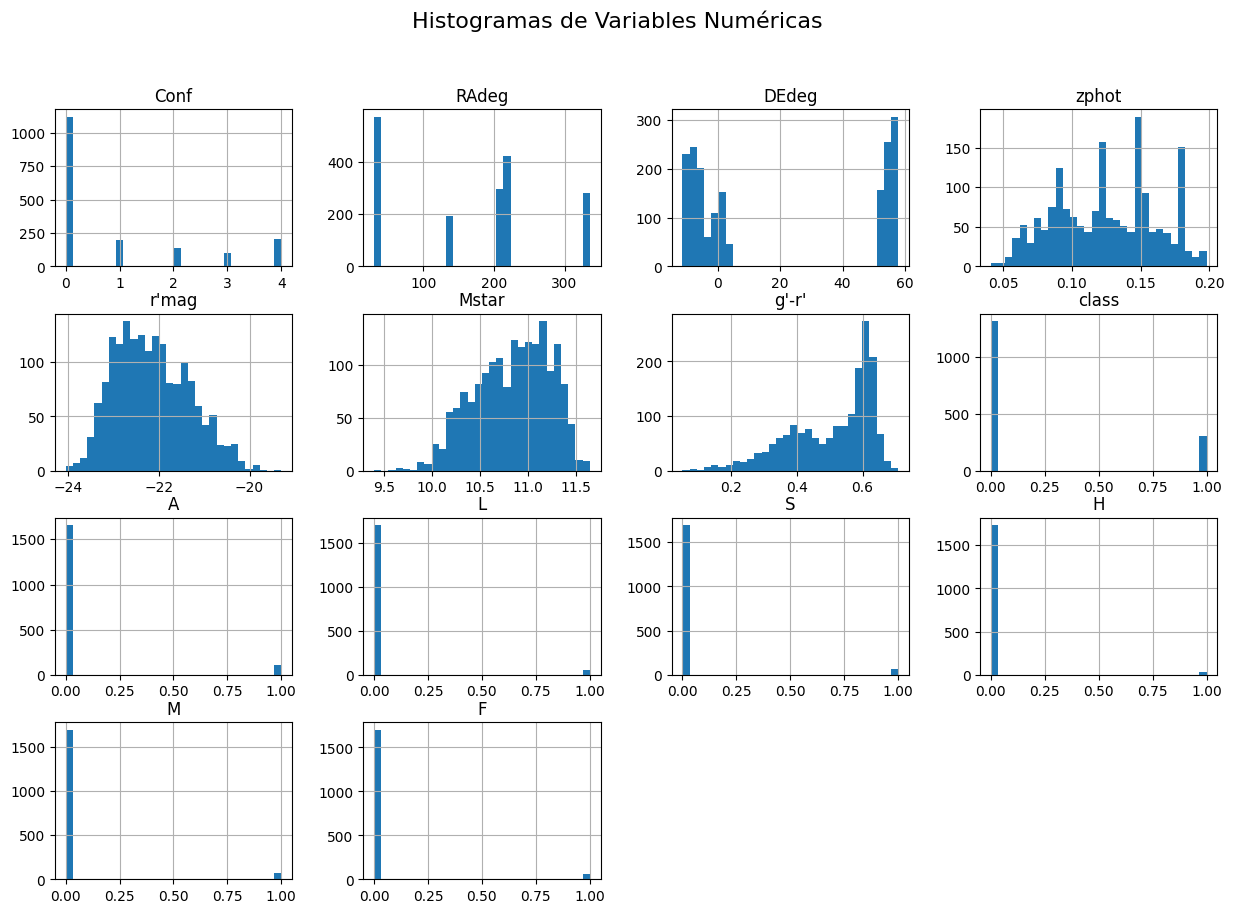

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar histogramas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns].hist(bins=30, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
plt.show()

- Mstar: Tiene una distribución ligeramente sesgada a la izquierda, podría beneficiarse de una transformación como la inversión o estandarización.
- zphot: Muestra un sesgo a la derecha con una larga cola hacia valores altos, una transformación logarítmica podría reducir este sesgo.
- g'-r': La distribución es relativamente simétrica, con un ligero sesgo a la derecha, podría usarse sin transformación adicional.
- r'mag: Tiene una distribución asimétrica hacia valores bajos (izquierda), esto sugiere la necesidad de una transformación inversa o estandarización.

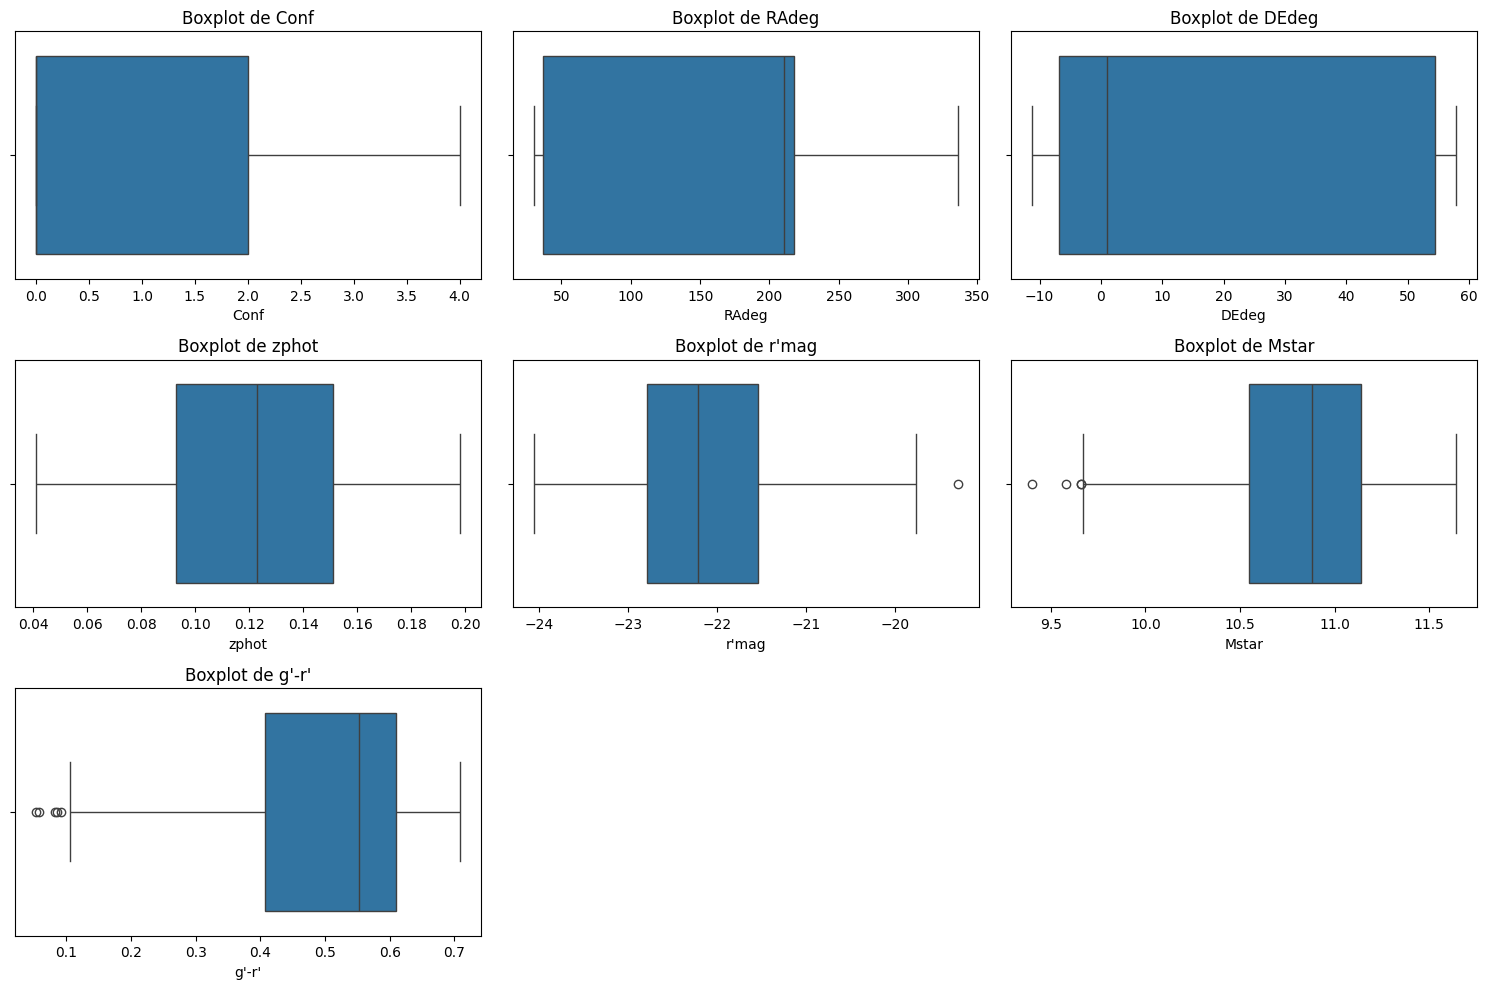

In [39]:
bin_vars=['class','A','L','S','H','M', 'F']

cont_vars =  [ col for col in numeric_columns if col not in bin_vars]

# Boxplots de variables numéricas
plt.figure(figsize=(15, 10))
for i, column in enumerate(cont_vars):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

Presencia de valores atípicos: Se identificaron en las columnas r'mag, Mstar y g'-r'. Representan menos del 1% de los datos en cada caso.

Posibles causas:

- En r'mag, podrían reflejar objetos excepcionalmente brillantes o muy tenues.
- En Mstar, podrían indicar galaxias masivas inusuales o errores en la estimación.
- En g'-r', podrían asociarse con propiedades espectrales únicas, como formación estelar intensa.

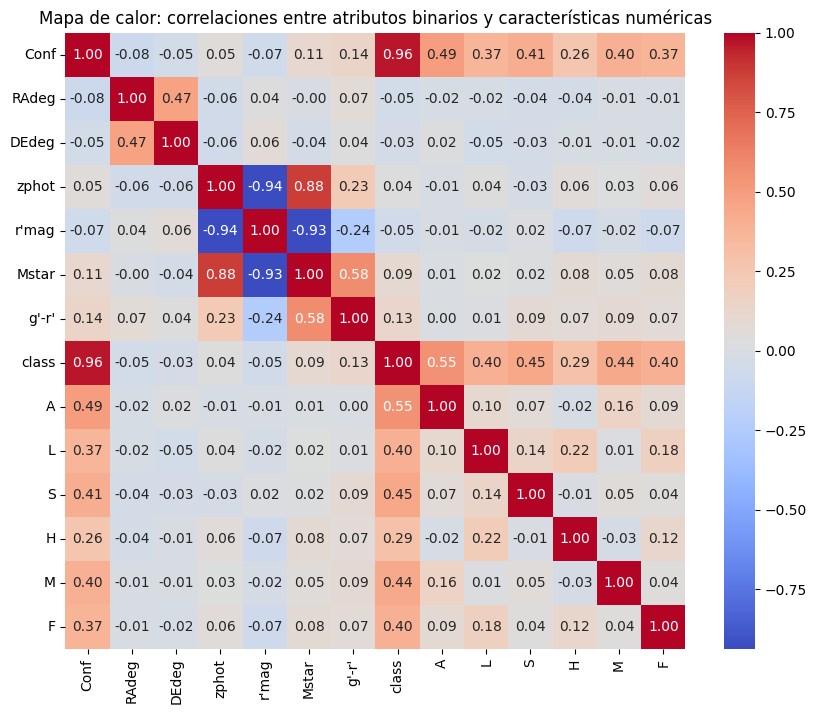

In [44]:
# Matriz de correlación
correlations = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor: correlaciones entre atributos binarios y características numéricas")
plt.show()

Relaciones significativas:

- Se observa una alta correlación entre Mstar (masa estelar) y zphot (redshift), lo que indica que los objetos más masivos tienden a estar a mayores distancias.
g'-r' (índice de color) también muestra correlaciones moderadas con Mstar, lo que sugiere que el color de los objetos puede estar relacionado con su masa estelar y, posiblemente, su etapa de evolución.

- Variables independientes: Algunas columnas, como RAdeg y DEdeg (coordenadas espaciales), no muestran correlaciones fuertes con otras variables, lo cual es esperado, ya que representan posiciones en el cielo y no propiedades físicas.

# Relaciones entre variables

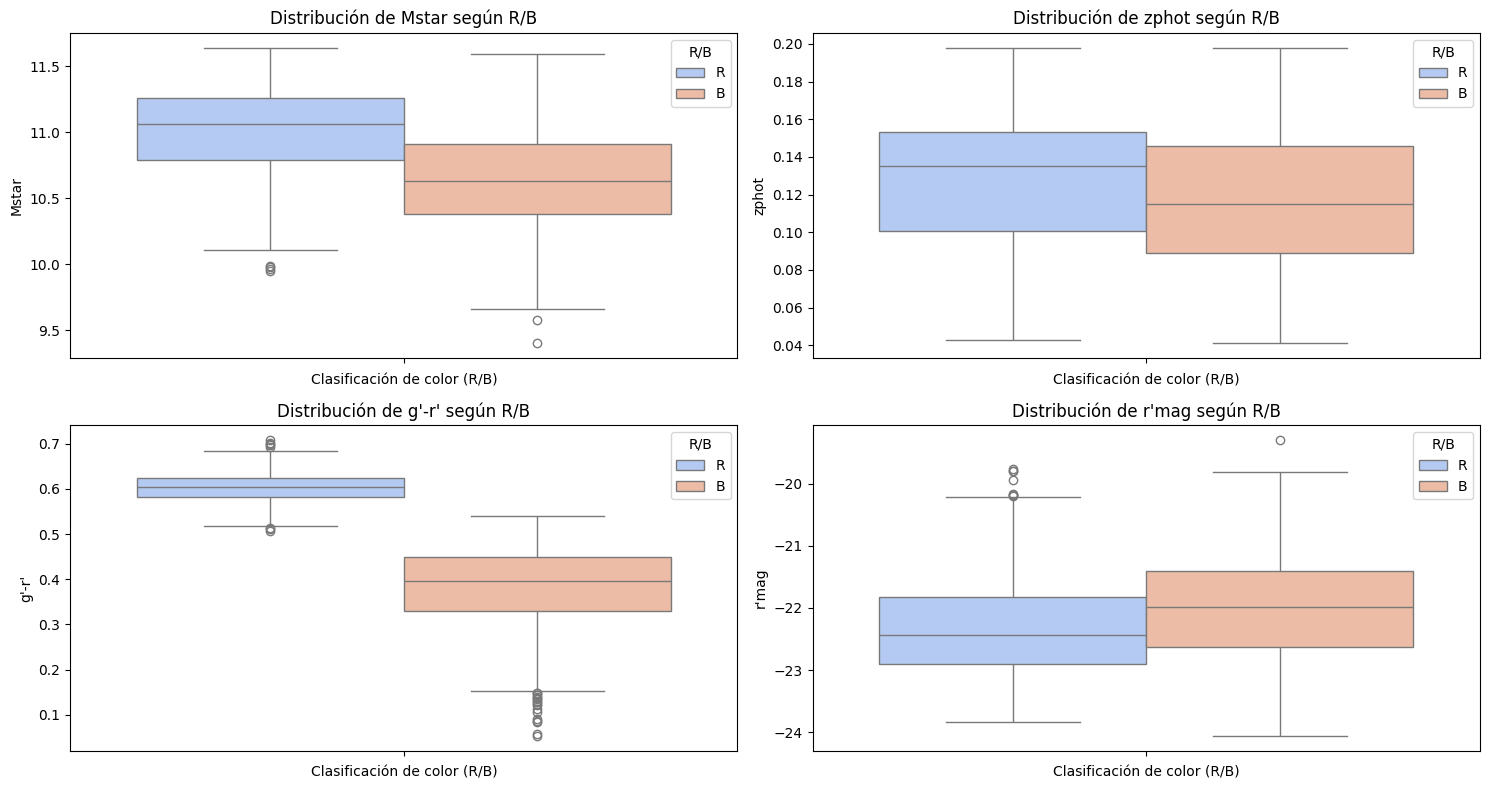

In [41]:
#Distribución de características numéricas por `R/B`
plt.figure(figsize=(15, 8))
for i, col in enumerate(["Mstar", "zphot", "g'-r'", "r'mag"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, hue="R/B", y=col, palette="coolwarm")
    plt.title(f"Distribución de {col} según R/B")
    plt.xlabel("Clasificación de color (R/B)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

- Las galaxias clasificadas como rojas (R) tienen una mayor masa estelar (Mstar) y valores más altos de color rojo (g'-r'), mientras que las azules (B) tienden a tener menores valores en estas métricas.
- Las galaxias enanas (class = 1) tienden a tener menor masa estelar y redshift fotométrico en comparación con las no enanas, con diferencias observables también según el color (R/B).

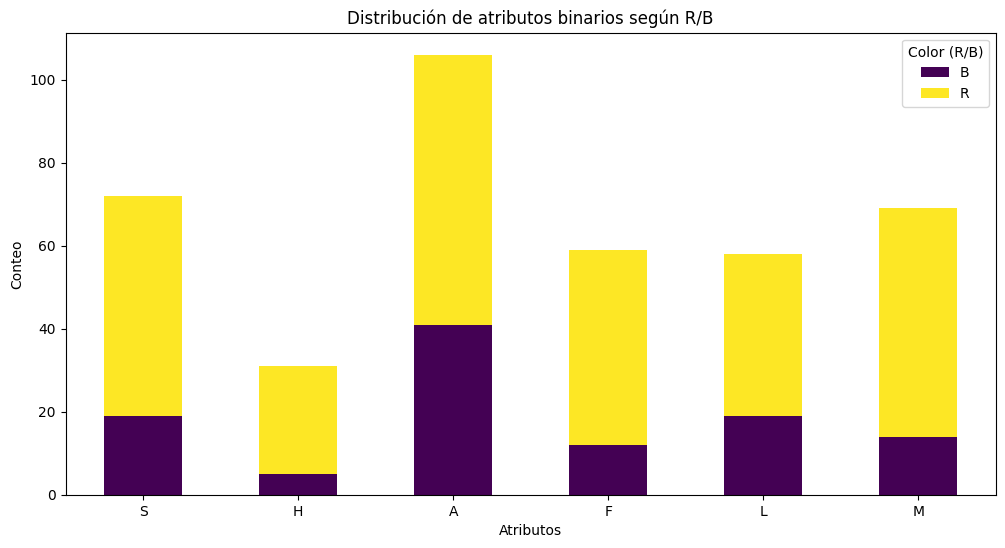

In [42]:
#Conteo de atributos binarios (`S`, `H`, `A`, `F`, `L`, `M`) según `R/B`
binary_features = ["S", "H", "A", "F", "L", "M"]
binary_dist_by_rb = data.groupby("R/B")[binary_features].sum().transpose()

# Graficar la distribución de atributos binarios
binary_dist_by_rb.plot(kind="bar", figsize=(12, 6), stacked=True, colormap="viridis")
plt.title("Distribución de atributos binarios según R/B")
plt.ylabel("Conteo")
plt.xlabel("Atributos")
plt.legend(title="Color (R/B)", loc="upper right")
plt.xticks(rotation=0)
plt.show()


Todos atributos, a excepción de A, son más comunes en las galaxias rojas (R).

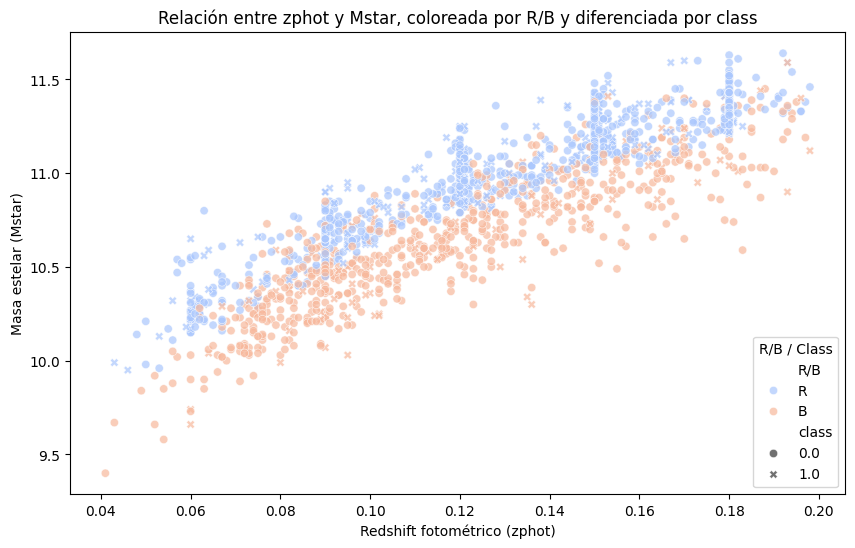

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, 
    x="zphot", 
    y="Mstar", 
    hue="R/B", 
    style="class", 
    palette="coolwarm", 
    alpha=0.7
)
plt.title("Relación entre zphot y Mstar, coloreada por R/B y diferenciada por class")
plt.xlabel("Redshift fotométrico (zphot)")
plt.ylabel("Masa estelar (Mstar)")
plt.legend(title="R/B / Class", loc="lower right")
plt.show()

- Se observan dos regiones, se observa que los elementos de mayor masa estelar tienden a ser azules independientemente de la distancia (inferida por el redshift).
- Las galaxias enanas, identificadas como class = 1 son mas frecuentes en la region superior.
- Las galaxias no enanas presentan una mayor diversidad, con un rango más amplio de masas estelares y redshifts. En esta categoría, predominan las galaxias azules, lo que indica una actividad de formación estelar más reciente y activa.

In [49]:
cont_vars

['Conf', 'RAdeg', 'DEdeg', 'zphot', "r'mag", 'Mstar', "g'-r'"]

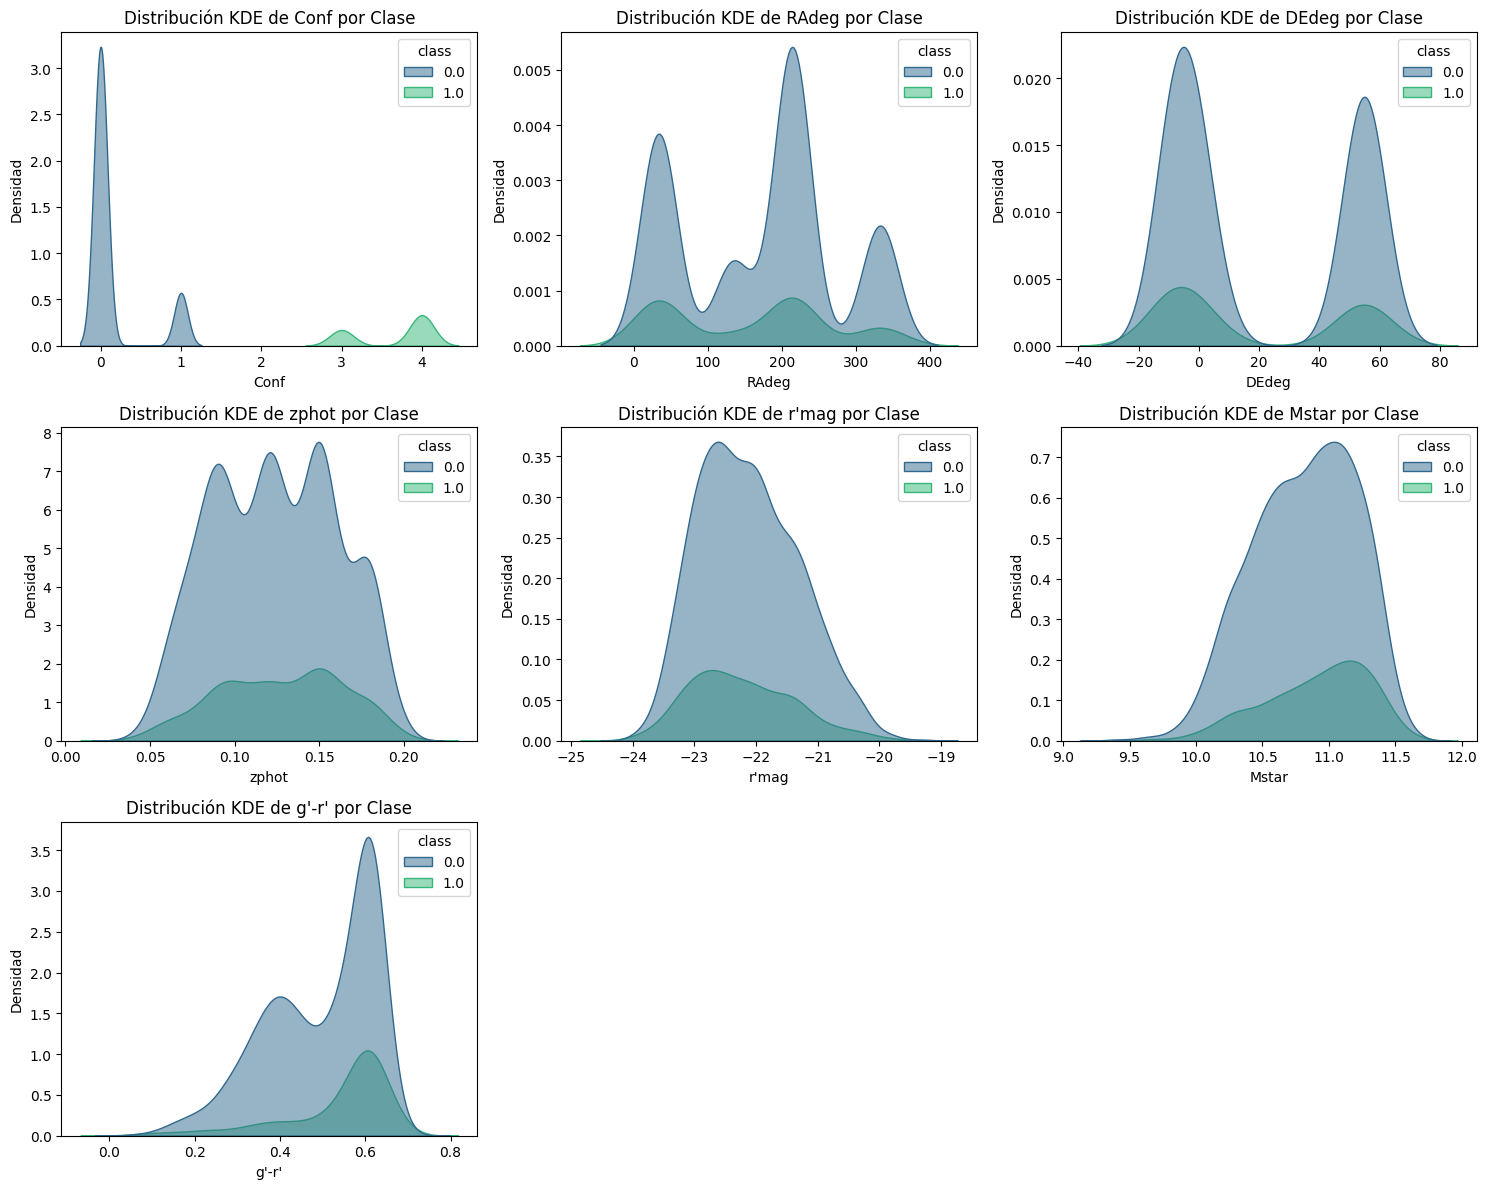

In [61]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(cont_vars, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=data, x=feature, hue="class", fill=True, palette="viridis", alpha=0.5)
    plt.title(f"Distribución KDE de {feature} por Clase")
    plt.xlabel(feature)
    plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

- Los objetos clasificados como galaxias (class = 1) tienen valores de r'mag más bajos (más negativos), indicando que son más brillantes.
- Los objetos clasificados como no galaxias (class = 0) presentan valores de r'mag más altos (menos negativos), lo que sugiere que son menos brillantes.
- Existe una clara separación en las distribuciones entre las dos clases, lo que indica que r'mag podría ser una característica relevante para distinguir galaxias de otros objetos.
- La densidad de r'mag para class = 1 muestra una distribución más sesgada hacia valores bajos.
Para class = 0, la distribución está más concentrada en valores altos, con una menor dispersión.

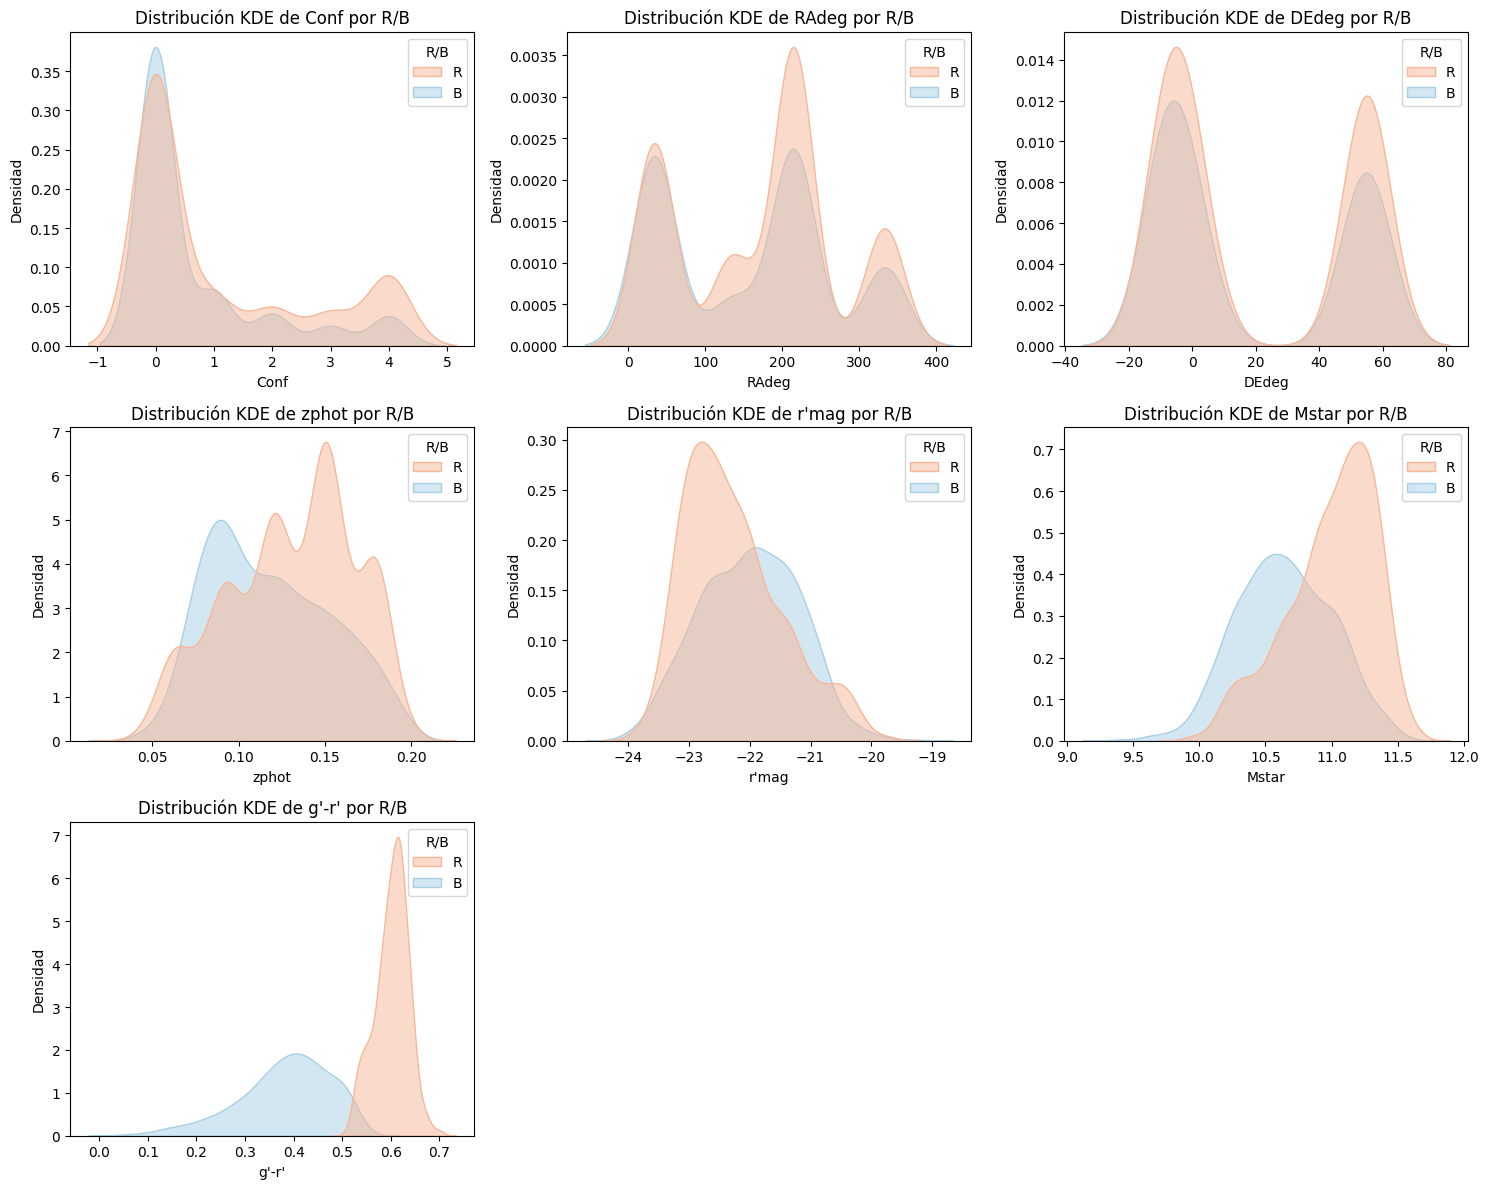

In [62]:
# KDE de las mismas variables separadas por R/B
plt.figure(figsize=(15, 12))
for i, feature in enumerate(cont_vars, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=data, x=feature, hue="R/B", fill=True, palette = "RdBu", alpha=0.5)
    plt.title(f"Distribución KDE de {feature} por R/B")
    plt.xlabel(feature)
    plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

  - La densidad de `zphot` para objetos rojos (`R`) se concentra en valores más altos, indicando que los objetos rojos suelen estar más distantes.
  - Los objetos azules (`B`) tienen su densidad principalmente en valores más bajos de `zphot`, lo que sugiere que están más cercanos.
  - Aunque existe cierta superposición entre las distribuciones de `R` y `B`, las diferencias son notables, especialmente en las colas de las distribuciones.
  - La distribución de `zphot` para `R` parece más sesgada hacia valores altos, mientras que para `B` tiene una caída más rápida después del pico.

# EDA Imagenes

In [28]:
import os
from PIL import Image

# Ruta de la carpeta con imágenes
image_dir = IMAGE_DIR

# Inspeccionar las propiedades básicas
image_properties = []
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    with Image.open(img_path) as img:
        image_properties.append({
            'name': img_name,
            'format': img.format,
            'mode': img.mode,
            'size': img.size,  # (width, height)
        })

# Crear DataFrame con las propiedades
import pandas as pd
image_df = pd.DataFrame(image_properties)
print(image_df.head())

# Resumen de formatos y dimensiones
print(image_df['format'].value_counts())
print(image_df['size'].value_counts())


               name format mode        size
0  W1-100_color.jpg   JPEG  RGB  (424, 424)
1  W1-101_color.jpg   JPEG  RGB  (424, 424)
2  W1-102_color.jpg   JPEG  RGB  (424, 424)
3  W1-103_color.jpg   JPEG  RGB  (424, 424)
4  W1-104_color.jpg   JPEG  RGB  (424, 424)
format
JPEG    1760
Name: count, dtype: int64
size
(424, 424)    1760
Name: count, dtype: int64


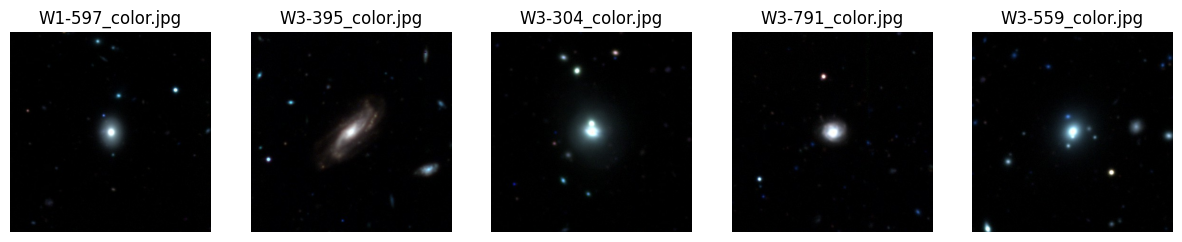

In [29]:
import matplotlib.pyplot as plt
import random

# Seleccionar imágenes aleatorias
sample_images = random.sample(os.listdir(image_dir), 5)

# Mostrar las imágenes
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.show()

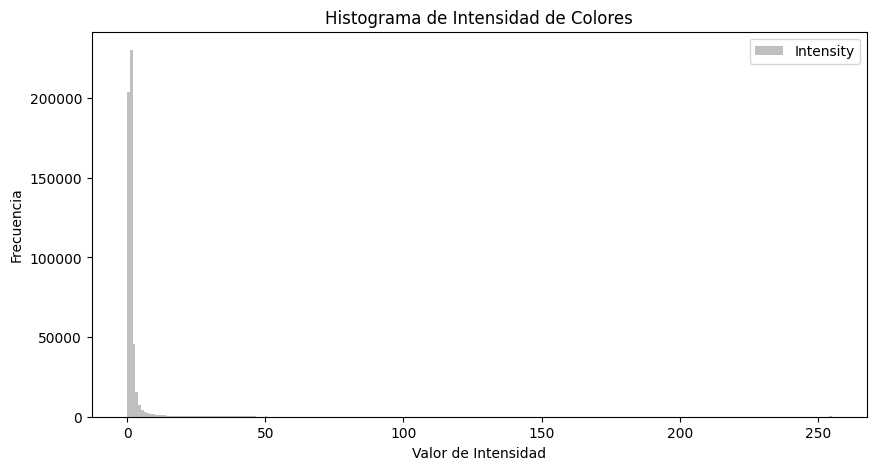

In [30]:
import numpy as np

# Función para calcular histograma de colores
def plot_color_histogram(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    plt.figure(figsize=(10, 5))
    plt.hist(img_array.ravel(), bins=256, color='gray', alpha=0.5, label='Intensity')
    plt.xlabel("Valor de Intensidad")
    plt.ylabel("Frecuencia")
    plt.title("Histograma de Intensidad de Colores")
    plt.legend()
    plt.show()

# Analizar una imagen de ejemplo
example_image = os.path.join(image_dir, sample_images[0])
plot_color_histogram(example_image)


En general se observa una distribución de brillo muy sesgada en las imagenes ya que predomina el negro, se deberia considera un ajuste de contraste.

In [32]:
# Comparar imágenes con la metadata
metadata_images = set(data['img_name'])
available_images = set(os.listdir(image_dir))

# Imágenes faltantes en la metadata
missing_in_metadata = available_images - metadata_images
print(f"Imágenes no listadas en la metadata: {len(missing_in_metadata)}")

# Imágenes faltantes en el directorio
missing_in_folder = metadata_images - available_images
print(f"Imágenes listadas en la metadata pero no en el directorio: {len(missing_in_folder)}")

Imágenes no listadas en la metadata: 0
Imágenes listadas en la metadata pero no en el directorio: 0


- No falta metadata ni imagenes.
- Es necesario retocar el contraste de las imagenes
- Habría que considerar alguna técnica para aislar el objeto de interés
- Tambien es necesario reducir el tamaño de las imagenes como para entrenar un modelo de redes neuronales.